In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob
import pickle
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.pyplot import get_cmap


from scipy.spatial.distance import cdist




In [2]:
src_dir = os.path.abspath(os.path.join(os.pardir,os.pardir,'src'))
sys.path[0] = src_dir

# from analysis.density import cdf_dist_arrid_vec

In [3]:
(np.sqrt(5)-1.0)/2.0

0.6180339887498949

# Setup Plot

# Select parameters

In [4]:
path_read = os.path.join(os.pardir,'data_filter')
fname_read = 'ipip300-no0_arr_pd_neoac_score-1.npy'
filename = os.path.join(path_read,fname_read)
arr_pd =  np.load(filename)


In [5]:
#####
# z-score the data in each dimension
#####
N_,D_ = np.shape(arr_pd)
for d in range(D_):
    x_tmp = arr_pd[:,d]
    x_mu = np.mean(x_tmp)
    x_std = np.std(x_tmp)
    arr_pd[:,d] = (x_tmp - x_mu)/x_std

In [6]:
np.mean(arr_pd,axis=0),np.std(arr_pd,axis=0)

(array([ 3.04962354e-17, -2.69774390e-17,  3.12781901e-18, -1.21202987e-17,
         2.50225521e-17]), array([1., 1., 1., 1., 1.]))

In [7]:

arr_d = np.linspace(0.0,10.0,1001)


In [8]:
arr_d

array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ])

In [9]:
n_rep = 1000

arr_N_d = np.zeros(( n_rep,len(arr_d) ))

for i_n_rep in range(n_rep):
    i_sel = np.random.randint(N_)
    x_sel = arr_pd[i_sel:i_sel+1,:]
    S = cdist(arr_pd,x_sel)[:,0]

    for i_d,d in enumerate(arr_d):
        N_d = len(np.where(S<=d)[0])
        arr_N_d[i_n_rep,i_d] = N_d

/home/martin/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


Text(0, 0.5, 'Number of respondents within radius $r$')

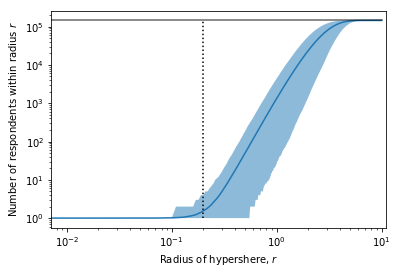

In [10]:
x = arr_d
z = arr_N_d#/N_
y = np.mean(z,axis=0)
# yerr=np.std(z,axis=0)
y_perc = np.percentile(z,q=[2.5,97.5],axis=0)
y_err = 0.0*y_perc
y_err[0] = y-y_perc[0]
y_err[1] = y_perc[1]-y
plt.plot(x,y,marker='o',ms=0)
plt.fill_between(x,y_perc[0],y_perc[1],alpha=0.5)

plt.plot([min(arr_d),max(arr_d)],[N_,N_],color='black',ls='-',alpha=0.6)
plt.plot([0.2,0.2],[1,N_],ls=':',color='black')

plt.yscale('log')
plt.xscale('log')
# plt.xlim(0,max(arr_d))
plt.xlim(0,11)

plt.xlabel(r'Radius of hypershere, $r$')
plt.ylabel(r'Number of respondents within radius $r$')

In [11]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 246  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/1.8# Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
Ampl = 1.0 # Amplification factor for screen: set this to ONE for final plot of eps
fig_size = [Ampl*fig_width,Ampl*fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.labelsize': Ampl*10,
#           'text.fontsize': Ampl*10,
          'legend.fontsize': Ampl*8,
          'xtick.labelsize': Ampl*10,
          'ytick.labelsize': Ampl*10,
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          #'figtext.fontsize': Ampl*10,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False

         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


0.23


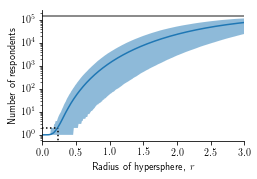

In [15]:
cmap = get_cmap('tab10')


f = plt.figure()
plt.clf()
ax = f.add_subplot(111)

x = arr_d
z = arr_N_d#/N_
y = np.mean(z,axis=0)
# yerr=np.std(z,axis=0)
y_perc = np.percentile(z,q=[5,95],axis=0)
y_err = 0.0*y_perc
y_err[0] = y-y_perc[0]
y_err[1] = y_perc[1]-y
ax.plot(x,y,marker='o',ms=0)
ax.fill_between(x,y_perc[0],y_perc[1],alpha=0.5)

ax.plot([min(arr_d),max(arr_d)],[N_,N_],color='black',ls='-',alpha=0.6)
ind_sel = np.where(y>2)[0][0]
d_sel = arr_d[ind_sel]
print(d_sel)
# ax.plot([d_sel,d_sel],[1,N_],ls=':',color='black')
ax.plot([d_sel,d_sel],[0,2],ls=':',color='black')
ax.plot([0,d_sel],[2,2],ls=':',color='black')


ax.set_yscale('log')
# ax.set_xscale('log')
# plt.xlim(0,max(arr_d))
ax.set_xlim(0,3)

ax.set_xlabel(r'Radius of hypersphere, $r$')
ax.set_ylabel(r'Number of respondents')


# plt.figtext(0.3,0.8,'%s - type '%(type_i))

# ax.plot([0.4,0.4],[0,1.57],ls=':',lw=1,color='black')
# ax.plot([0.8,0.8],[0,1.58],ls=':',lw=1,color='black')

plt.subplots_adjust(bottom=0.175,wspace=0.4,left=0.15)

path_save = '../figures/'
fname_save = 'commentary-freudenstein_fig-c-no-repsondents-in-hypersphere.png'
filename = os.path.join(path_save,fname_save)
plt.savefig(filename,dpi=300)